In [1]:
# Necessary because jupyter restricts relative imports from parent directories
import os
if os.getcwd().split('/')[-1] != 'tcav':
    print(os.getcwd())
    os.chdir('../')
    os.chdir('../')
    os.chdir('../')    
    print(os.getcwd())

/zhome/94/5/127021/speciale/tcav/tcav/tcav_examples/discrete
/zhome/94/5/127021/speciale/tcav


In [2]:
from tensorflow.io import gfile
from tcav.tcav_examples.discrete.kdd99_activation_generator import KDD99DiscreteActivationGenerator
from tcav.utils import create_session
from tcav.tcav_examples.discrete.kdd99_model_wrapper import KDD99KerasModelWrapper

from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)


2022-09-22 13:50:17.804546: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-22 13:50:18.031485: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /lsf/10.1/linux3.10-glibc2.17-x86_64/lib
2022-09-22 13:50:18.031517: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-22 13:50:18.078703: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-2

In [3]:
# Make source directory, 
source_dir = "./tcav_examples/discrete/kdd_sanity2"
working_dir = source_dir
acts_dir = os.path.join(working_dir, "activations")
gfile.makedirs(acts_dir)
cav_dir = os.path.join(working_dir, "cav")
gfile.makedirs(cav_dir)


In [4]:
# Make data
# ! python  tcav/tcav_examples/discrete/make_kdd99_concepts.py --source_dir={source_dir}


In [4]:
# Create models
label_path = os.path.join(source_dir, "labels.txt")
model_path = os.path.join(source_dir, "kdd99_2.h5")
uci_model = KDD99KerasModelWrapper(create_session(), model_path, label_path)



2022-09-22 13:50:27.721380: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-22 13:50:27.725246: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /lsf/10.1/linux3.10-glibc2.17-x86_64/lib
2022-09-22 13:50:27.725291: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-22 13:50:27.725322: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gbarlogin1): /proc/driver/nvidia/version does not exist


Instructions for updating:
Colocations handled automatically by placer.


2022-09-22 13:50:28.171699: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
/zhome/94/5/127021/miniconda3/envs/tcav_env/lib/python3.9/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [5]:
# Create activation generator
act_gen = KDD99DiscreteActivationGenerator(model=uci_model, source_dir=source_dir, acts_dir=acts_dir, max_examples=200)

In [6]:


target = "normal."
bottlenecks = ["dense", "dense_1" ]
concepts = ["dst_host_same_src_port_rate_less_than_one", "dst_host_same_src_port_rate_more_than_one"]
alphas = [0.01]



my_tcav = TCAV(create_session,
                   target,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=3,
                   num_random_concepts_to_pick = 1)


pair:  normal.
concept:  ['dst_host_same_src_port_rate_less_than_one']
pair:  normal.
concept:  ['dst_host_same_src_port_rate_more_than_one']
Concept:  dst_host_same_src_port_rate_less_than_one
process_what_to_run_expand: random500_0
process_what_to_run_expand: random500_0
process_what_to_run_expand: random500_0
Length of new_pairs_to_test_t =  1
Concept:  dst_host_same_src_port_rate_less_than_one
process_what_to_run_expand: random500_1
process_what_to_run_expand: random500_1
process_what_to_run_expand: random500_1
Length of new_pairs_to_test_t =  2
Concept:  dst_host_same_src_port_rate_less_than_one
process_what_to_run_expand: random500_2
process_what_to_run_expand: random500_2
process_what_to_run_expand: random500_2
Length of new_pairs_to_test_t =  3
Concept:  dst_host_same_src_port_rate_more_than_one
process_what_to_run_expand: random500_0
process_what_to_run_expand: random500_0
process_what_to_run_expand: random500_0
Length of new_pairs_to_test_t =  1
Concept:  dst_host_same_src_po

In [7]:
"""
my_tcav.params[0] #dir()
for i, param in enumerate(my_tcav.params):
    print(param.concepts)
    print(param.cav_dir)
"""

'\nmy_tcav.params[0] #dir()\nfor i, param in enumerate(my_tcav.params):\n    print(param.concepts)\n    print(param.cav_dir)\n'

In [8]:
results = my_tcav.run(overwrite=True)

INFO:tensorflow:running 16 params
INFO:tensorflow:Running param 0 of 16
INFO:tensorflow:running normal. ['dst_host_same_src_port_rate_less_than_one', 'random500_0']
INFO:tensorflow:Loaded ./tcav_examples/discrete/kdd_sanity2/activations/acts_dst_host_same_src_port_rate_less_than_one_dense shape (200, 1000)
INFO:tensorflow:Loaded ./tcav_examples/discrete/kdd_sanity2/activations/acts_random500_0_dense shape (2, 1000)
INFO:tensorflow:Loaded ./tcav_examples/discrete/kdd_sanity2/activations/acts_normal._dense shape (200, 1000)
INFO:tensorflow:Training CAV ['dst_host_same_src_port_rate_less_than_one', 'random500_0'] - dense alpha 0.01
INFO:tensorflow:training with alpha=0.01
INFO:tensorflow:acc per class {'dst_host_same_src_port_rate_less_than_one': 1.0, 'random500_0': 1.0, 'overall': 1.0}
INFO:tensorflow:CAV accuracies: {'dst_host_same_src_port_rate_less_than_one': 1.0, 'random500_0': 1.0, 'overall': 1.0}
INFO:tensorflow:Running param 1 of 16
INFO:tensorflow:running normal. ['dst_host_same_

In [10]:
#results
with open('result_test.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
with open('result_test.pickle', 'rb') as handle:
    results = pickle.load(handle)

Class = normal.
  Concept = dst_host_same_src_port_rate_less_than_one
>>> Number of TCAV concept observations <<<
 3
>>> Number of TCAV random observations <<<
 2
    Bottleneck = dense. TCAV Score = 1.00 (+- 0.00), random was 0.50 (+- 0.50). p-val = 0.272 (not significant)
>>> Number of TCAV concept observations <<<
 3
>>> Number of TCAV random observations <<<
 2
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.00), random was 0.50 (+- 0.50). p-val = 0.272 (not significant)
  Concept = dst_host_same_src_port_rate_more_than_one
>>> Number of TCAV concept observations <<<
 3
>>> Number of TCAV random observations <<<
 2
    Bottleneck = dense. TCAV Score = 1.00 (+- 0.00), random was 0.50 (+- 0.50). p-val = 0.272 (not significant)
>>> Number of TCAV concept observations <<<
 3
>>> Number of TCAV random observations <<<
 2
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.00), random was 0.50 (+- 0.50). p-val = 0.272 (not significant)
>>> index <<<
 []
>>> # concepts <<<
 0
>>> # bottle

/zhome/94/5/127021/speciale/tcav/tcav/utils_plot.py:96: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, p_val = ttest_ind(random_i_ups[bottleneck], i_ups)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (0,) and arg 1 with shape (2,).

<Figure size 640x480 with 0 Axes>

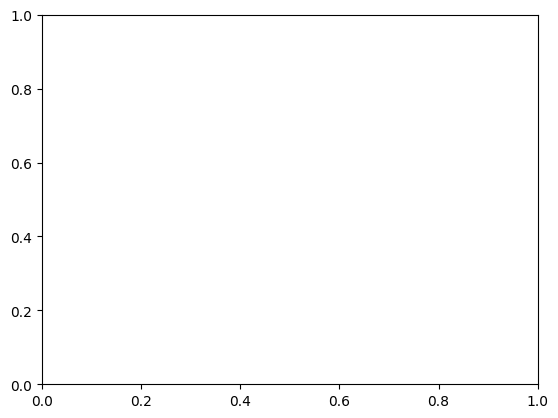

In [9]:
utils_plot.plot_results(results, num_random_exp=3)
